<a href="https://colab.research.google.com/github/sudiptaroyshuvo/sarprocessinginpython/blob/main/Antennas_of_a_MRRS_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
print(sys.executable)

/usr/bin/python3


In [ ]:
import scipy.constants as constants
import matplotlib.pyplot as plt
import numpy as np

Typical frequencies of spaceborne MRRS systems cover the range between 400 MHz and 10 GHz. The plot below shows the equivalence between these frequencies and their wavelengths. Please identify the microwave frequency bands according to the IEEE denomination standard.

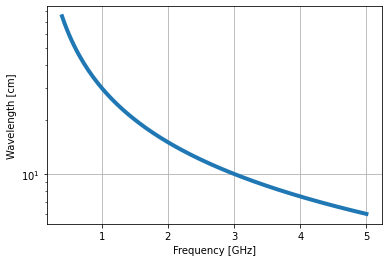

In [ ]:
N  = 128
f0 = np.arange(N) / (N-1) * 4.6e9 + 400e6
wl = constants.c / f0

plt.figure()
plt.plot(f0/1.e9, wl * 1e2, lw=4)
plt.yscale('log')
plt.xlabel('Frequency [GHz]')
plt.ylabel('Wavelength [cm]')
plt.grid()
plt.show()

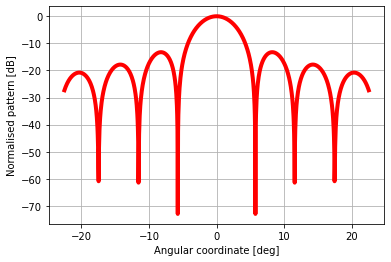

In [ ]:
N   = 1024
th  = -np.pi/8. + np.arange(N) / (N-1) * np.pi/4.
L   = 1
# L=2
wl  = 0.1
#wl  = 0.6

# write a function (getPattern) to form the antenna pattern
k=1

x=(L/wl)*np.sin(th)

def getPattern(wl, L, th):
    ### **your code here**
    
    D=k*pow((np.sin(np.pi*x)/(np.pi*x)),2)
    return D


pat = getPattern(wl, L, th)

plt.figure()
plt.plot(th * 180. / np.pi, 10 * np.log10(pat), 'r', lw = 4)
plt.xlabel('Angular coordinate [deg]')
plt.ylabel('Normalised pattern [dB]')
plt.grid()
plt.show()

From the engineering persepective, the main lobe illuminates the area of interest. The part of the main lobe radiating or capturing most of the power is called the aperture of the antenna, and helps approximate the radiation of the antenna as a pass/reject system.

The aperture in radians can be approximated as

𝜃ap≈𝜆/𝐿.

In [ ]:
s=wl/L
print (s)
th_ap= s*180/np.pi
print (th_ap)
ap_th=th_ap/2
print (ap_th)

0.1
5.729577951308232
2.864788975654116


In [ ]:
patI= np.ones(N)
print(patI.shape)
np.min(pat)
np.max(pat)

(1024,)


0.999951522685657

Modify the following code to show the angular extension covered by the aperture approximation.

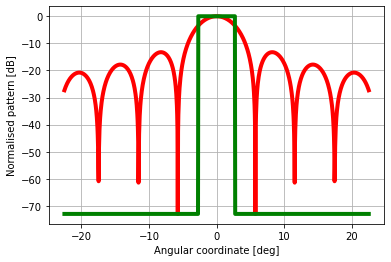

In [ ]:
# complete the code to show the angular extension by using the formula above. 



patI= np.ones(N)
### **your code here**
patI2=np.hstack((patI[0:3], patI[-3:]))
patI[-450:]= np.min(pat)
patI[:450]= np.min(pat)


plt.figure()
plt.plot(th * 180 / np.pi, 10 * np.log10(pat), 'r', lw = 4)
plt.plot(th * 180 / np.pi, 10 * np.log10(patI), 'g', lw = 4)
plt.xlabel('Angular coordinate [deg]')
plt.ylabel('Normalised pattern [dB]')
plt.grid()
plt.show()

The size of the TerraSAR-X antenna is 0.7 m in elevation and 4.7 m in azimuth. Assuming an efficiency of 0.9 compute the gain in dBi.

In [ ]:
f0    = 9.65e9
wl    = constants.c / f0

# **your code here**
e=0.9
Lel = 0.7
Laz= 4.7
A= Lel*Laz
D= (4*np.pi*A)/pow(wl,2)
G=20*np.log10(e*D)
print(G)

91.7212298448625


If a change in the radiation pattern is desired, other than changing the physical characteristics of the antenna, this can be done by weighting the distribution of the current flowing trough the antenna. Nevertheless, complex waveforms could show several practical limitations by complicating hardware and reducing the sensitivity of the system.

In order to overcome these limitations, several antennas may be used together forming arrays, which allows for dynamic beam-forming and electronic steering.

The TerraSAR-X antenna is a phased-array type with 12 elements in azimuth. The bottom program computes the element and array patterns by assuming unitary weightings.

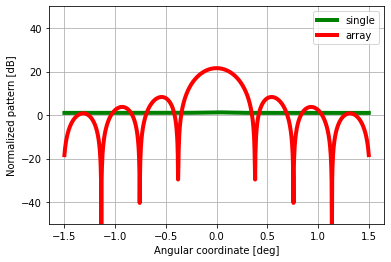

In [ ]:
f0    = 9.65e9
wl    = constants.c / f0
N     = 1024
th    = -np.pi/120. + np.arange(N) / (N-1) * np.pi/60.
L     = 4.7 # Total antenna lenght
Nel   = 12  # Number of elements
dx    = L/Nel * (-0.5 * Nel + 0.5 + np.arange(Nel))  # distance between the array elements


def Lin2dB(input):
    return 10 * np.log10(input)
def dB2Lin(input):
    return 10**(input/10)

## Generate the antenna pattern for a single element

# copy and paste the previously defined "getPattern" function
k=1

x=(L/wl)*np.sin(th)
def getPattern(wl, L, th):
    ### **your code here**
    D=k*pow((np.sin(np.pi*x)/(np.pi*x)),2)
    return D
# use "getPattern" to generate the antenna pattern for a single element. 
# Remember that the whole antenna, composed by Nel elements, has total leght L.

# **your code here**
l=L/Nel
patEl = getPattern(wl, l, th)

##

## Define a function (getArrayPattern) to generate the array antenna pattern
def getArrayPattern(th, patEl, w, wl, dx):
    # **your code here**
    N  = len(th)
    #d_x=len(dx)
    n=12
    weights= np.ones(Nel)/Nel
    w=np.sum( weights)   
    e = np.exp(-2j*np.pi/wl* np.sin(th))
    AF=w*n*e
    return patEl * abs(AF)**2
## Try out different weights distributions and comment on the results

# opt1: uniformly distributed weights
weights= np.ones (Nel)/Nel

# opt2: rect distribution
#weights = np.ones(Nel)
#weights[(np.arange(Nel)-Nel/2)>Nel/8] = 0
#weights = weights / np.sum(weights) pool

# opt3: complex weights distribution
#weights = np.exp(2j * np.pi / wl * dx * np.sin(0.3 * np.pi / 180.)) / Nel

##

pat = getArrayPattern(th, patEl, weights*Nel, wl, dx)

plt.figure()
plt.plot(th * 180. / np.pi, dB2Lin(patEl), 'g', lw = 4)
plt.plot(th * 180. / np.pi, Lin2dB(pat), 'r', lw = 4)
plt.ylim(-50, 50)
plt.xlabel('Angular coordinate [deg]')
plt.ylabel('Normalized pattern [dB]')
plt.legend(['single','array'])
plt.grid()
plt.show()

Express the thermal noise power (in dBm or dB relative to 1 mW) of an MSSR system with a bandwidth of 5 MHz and a receiver noise figure of 2.7 dB.

In [ ]:
k=1.38*10**-23
B=5
F=2.7
T=290   #room temp 290 kelvin
N_0=1  #1mW
N=k*T*B*F   #in watt
N_db=10*np.log10(N/N_0)   #in db
print (N_db)

-192.673891472048
